## GMV - Global Minimum Variance Portfolio

- Markowitz analyse of estimation based on expected return can be noisy and not reliable
- GMV
    - No expected return parameter is needed
    - Minimize variance

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import pandas as pd
import risk_kit as rk
import numpy as np

In [2]:
ind = rk.get_ind_returns()
er = rk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()
l = ["Food", "Steel"]
rk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

In [3]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [5]:
# estimating simliar expected returns to see how it behaves
rk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])
# a small change on expected returns causes a dramatic change on portfolio weights

array([0.57930354, 0.42069646])

In [7]:
rk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [8]:
rk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

cml weights:  [3.03063076e-15 2.52737597e-15 6.56416298e-15 0.00000000e+00
 5.98774842e-15 1.23698402e-15 0.00000000e+00 4.55961480e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.33810837e-01 0.00000000e+00 3.36468644e-15
 0.00000000e+00 1.38704164e-01 5.74005331e-15 8.94091659e-02
 0.00000000e+00 0.00000000e+00 1.55177057e-02 0.00000000e+00
 0.00000000e+00 1.59142391e-15 6.65966476e-02 0.00000000e+00
 2.55483897e-15 0.00000000e+00]


<AxesSubplot:xlabel='Volatility'>

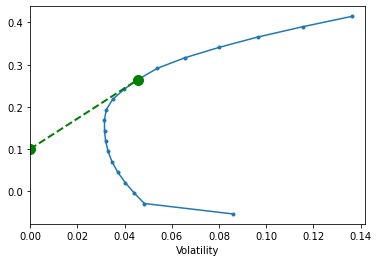

In [9]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

### Global Minimum Variance (GMV) + Equally Weighted Portfolio (EW)

In [11]:
def gmv(cov):
    # "min vol when returns are the same"
    # call msr with equal returns 
    n = cov.shape[0]
    return msr(0, np(1, n), cov)

def plot_ef(n_points, er, cov, style='.-', legend=False, show_cml=False, riskfree_rate=0, show_ew=False, show_gmv=False):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns", style=style, legend=legend)
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        print("cml weights: ", w_msr)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
    if show_ew:
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        print("ew weights: ", w_ew)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        # add EW
        ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)
    if show_gmv:
        w_gmv = gmv(cov)
        print("gmv weights: ", w_gmv)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)
        # add EW
        ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize=10)
        
    return ax

cml weights:  [3.03063076e-15 2.52737597e-15 6.56416298e-15 0.00000000e+00
 5.98774842e-15 1.23698402e-15 0.00000000e+00 4.55961480e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.33810837e-01 0.00000000e+00 3.36468644e-15
 0.00000000e+00 1.38704164e-01 5.74005331e-15 8.94091659e-02
 0.00000000e+00 0.00000000e+00 1.55177057e-02 0.00000000e+00
 0.00000000e+00 1.59142391e-15 6.65966476e-02 0.00000000e+00
 2.55483897e-15 0.00000000e+00]
ew weights:  [0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333]
gmv weights:  [3.13254280e-02 6.12453782e-13 8.37378880e-03 2.38181830e-03
 2.18497192e-14 7.82312929e-02 1.00947475e-12 6.48765333e-02
 5.09033793e-14 5.09793046e-15 1.36965019e

<AxesSubplot:xlabel='Volatility'>

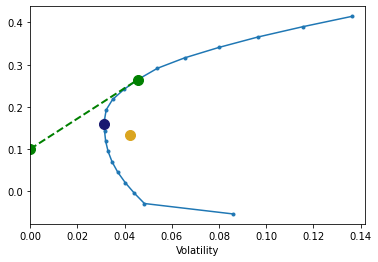

In [13]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)